# Data Science Salaries 2023

This dataset is useful for understanding the distribution of salaries in the data science field and how these can vary based on factors such as employee and employer location, level of experience, type of employment, among others. 

It allows us to explore the impact of remote work on data science salaries and begin to draw our own conclusions.

#### VARIABLES

<table>
  <tr>
    <th>Column Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>work_year</td>
    <td>The year the salary was paid.</td>
  </tr>
  <tr>
    <td>experience_level</td>
    <td>The level of experience in the job during the year.</td>
  </tr>
  <tr>
    <td>employment_type</td>
    <td>The type of employment for the role.</td>
  </tr>
  <tr>
    <td>job_title</td>
    <td>The role performed during the year.</td>
  </tr>
  <tr>
    <td>salary</td>
    <td>The gross total of the salary paid.</td>
  </tr>
  <tr>
    <td>salary_currency</td>
    <td>The currency of the salary paid as an ISO 4217 currency code.</td>
  </tr>
  <tr>
    <td>salaryinusd</td>
    <td>The salary in United States dollars (USD).</td>
  </tr>
  <tr>
    <td>employee_residence</td>
    <td>The primary country of residence of the employee during the work year as an ISO 3166 country code.</td>
  </tr>
  <tr>
    <td>remote_ratio</td>
    <td>The total amount of work done remotely.</td>
  </tr>
  <tr>
    <td>company_location</td>
    <td>The country of the employer's main office or contracting branch.</td>
  </tr>
  <tr>
    <td>company_size</td>
    <td>The median number of people who worked for the company during the year.</td>
  </tr>
</table>

### Objetives:

The main objective of this exercise is to learn and apply data analysis and visualization techniques using the Python libraries Matplotlib, Seaborn and Plotly.

The proper steps to complete it are:

1. **Explore the data set**: Understand the structure of the data set, the types of variables present and how they are distributed.
 **Clean and prepare the data set**: Manipulate the data to make it more accessible and useful for analysis. This may include dealing with missing values, converting data types, and generating new variables from existing ones.
   
2. **Analyze the data set**: Extract useful and meaningful information from the data set through various data analysis techniques. </br>
 **Visualize data**: Create graphs and diagrams that help understand and communicate the patterns and relationships present in the data.

To answer the questions posed, the following libraries should be used:

- Use **Matplotlib** to create basic plots such as bar, line and scatter plots.
- Use **Seaborn** to create more complex and visually attractive graphics, taking advantage of its integration capabilities with pandas.
- Use **Plotly** to create interactive graphs that allow deeper exploration of the data.



### 1) First step: data loading, cleaning, exploration and first understanding of our dataset

#### Import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.express as px
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#### Load our dataset

In [2]:
pwd

'c:\\Users\\mar27\\OneDrive\\Documentos\\CURSOS\\DATA_ANALYTICS_UPGRADEHUB\\github\\plotly-practice'

In [3]:
df = pd.read_csv(r'C:\Users\mar27\OneDrive\Documentos\CURSOS\DATA_ANALYTICS_UPGRADEHUB\github\plotly-practice\ds_salaries.csv')

In [4]:
df.head(3)

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S

How many entries (rows) and variables (columns) does the data set have?

In [5]:
df.shape

(3755, 11)

What types of data does each column contain?

In [6]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Are there missing values ​​in the data set?

In [7]:
df.isnull().sum() # there's no missing values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

What is the distribution of the variables in our dataset?

In [8]:
df.describe().T

count           mean            std     min       25%  \
work_year      3755.0    2022.373635       0.691448  2020.0    2022.0   
salary         3755.0  190695.571771  671676.500508  6000.0  100000.0   
salary_in_usd  3755.0  137570.389880   63055.625278  5132.0   95000.0   
remote_ratio   3755.0      46.271638      48.589050     0.0       0.0   

                    50%       75%         max  
work_year        2022.0    2023.0      2023.0  
salary         138000.0  180000.0  30400000.0  
salary_in_usd  135000.0  175000.0    450000.0  
remote_ratio        0.0     100.0       100.0

Create a graph to visualize our numerical variables:

In [9]:
numerical_df = df.select_dtypes(include='number') # getting numerical columns
numerical_df

work_year   salary  salary_in_usd  remote_ratio
0          2023    80000          85847           100
1          2023    30000          30000           100
2          2023    25500          25500           100
3          2023   175000         175000           100
4          2023   120000         120000           100
...         ...      ...            ...           ...
3750       2020   412000         412000           100
3751       2021   151000         151000           100
3752       2020   105000         105000           100
3753       2020   100000         100000           100
3754       2021  7000000          94665            50

[3755 rows x 4 columns]

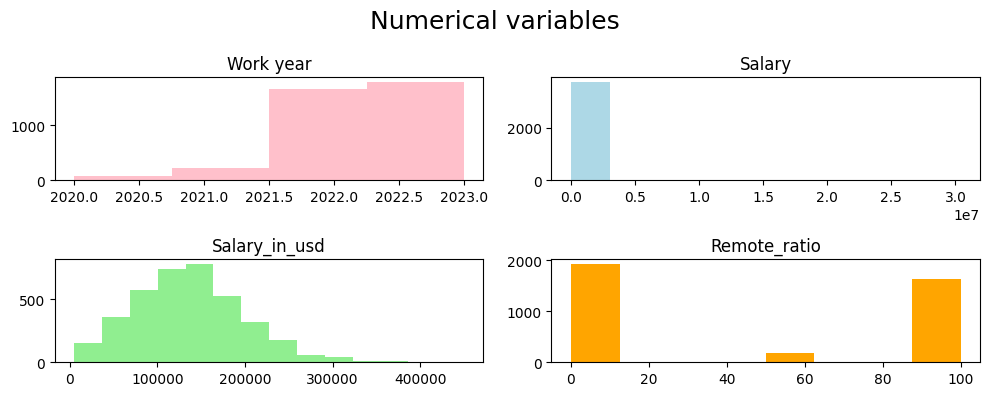

In [10]:
# Plotting numerical variables

fig, axes = plt.subplots(2,2, figsize=(10,4)) # 2 rows, 2 columns
fig.suptitle('Numerical variables', fontsize=18)

axes[0][0].hist(x=df['work_year'], color='pink', bins = 4)
axes[0][0].set_title('Work year')
axes[0][1].hist(x=df['salary'], color='lightblue')
axes[0][1].set_title('Salary')
axes[1][0].hist(x=df['salary_in_usd'], color='lightgreen', bins = 14)
axes[1][0].set_title('Salary_in_usd')
axes[1][1].hist(x=df['remote_ratio'], color='orange', bins = 8)
axes[1][1].set_title('Remote_ratio')

plt.tight_layout() # to avoid overlapping
plt.show;


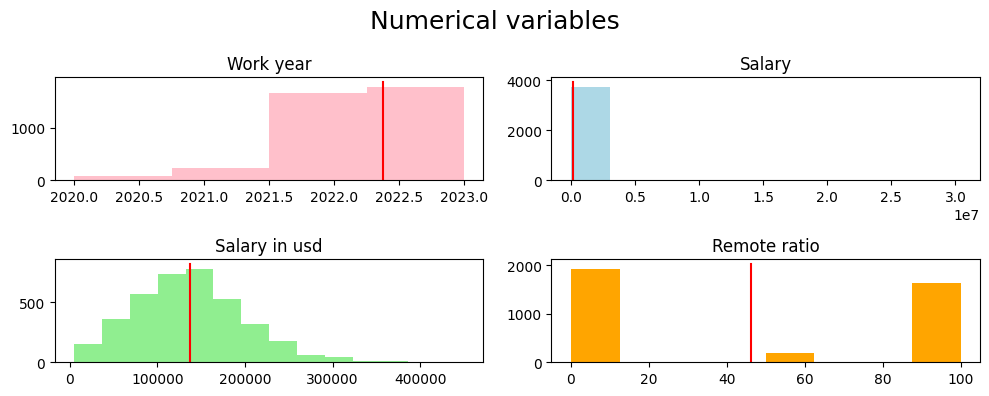

In [11]:

fig, axes = plt.subplots(2,2, figsize=(10,4))
fig.suptitle('Numerical variables', fontsize=18)

variables = [('work_year', 'pink', 4), ('salary', 'lightblue', 10), ('salary_in_usd', 'lightgreen', 14), ('remote_ratio', 'orange', 8)]

for (var, color, bins), ax in zip(variables, axes.flatten()):
    ax.hist(x=df[var], color=color, bins=bins)
    ax.set_title(var.capitalize().replace('_', ' '))
    mean = df[var].mean()
    ax.plot([mean, mean], [0, ax.get_ylim()[1]], color='red')  # Add mean line

plt.tight_layout()
plt.show()

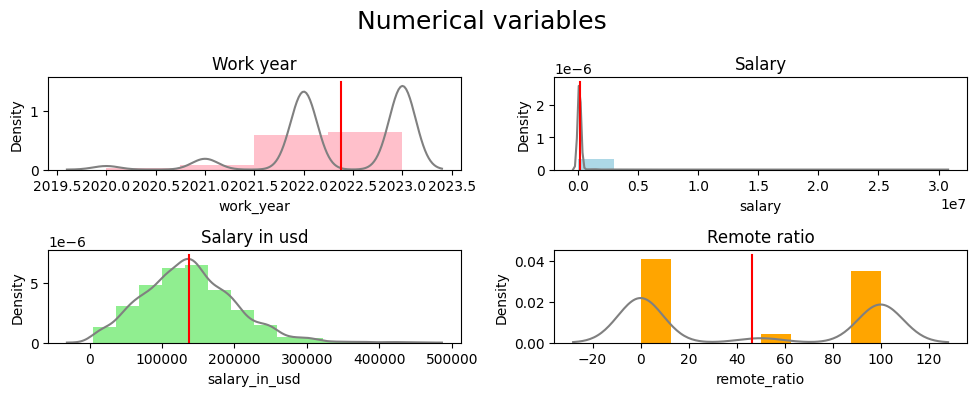

In [12]:
fig, axes = plt.subplots(2,2, figsize=(10,4))
fig.suptitle('Numerical variables', fontsize=18)

variables = [('work_year', 'pink', 4), ('salary', 'lightblue', 10), ('salary_in_usd', 'lightgreen', 14), ('remote_ratio', 'orange', 8)]

for (var, color, bins), ax in zip(variables, axes.flatten()):
    ax.hist(x=df[var], color=color, bins=bins, density=True)  # Add density=True to normalize the histogram
    sns.kdeplot(df[var], color='grey', ax=ax)  # Add KDE plot
    ax.set_title(var.capitalize().replace('_', ' '))
    mean = df[var].mean()
    ax.plot([mean, mean], [0, ax.get_ylim()[1]], color='red')  # Add mean line

plt.tight_layout()
plt.show()

In [13]:
for var in numerical_df.columns:
    fig = px.histogram(df, x=var, nbins=10, marginal="rug", title=var.capitalize().replace('_', ' '), color=var)
    fig.show()

Create a graph to visualize our categorical variables:

In [14]:
categorical_df = df.select_dtypes(include='object') # getting categorical columns
categorical_df

experience_level employment_type                 job_title  \
0                  SE              FT  Principal Data Scientist   
1                  MI              CT               ML Engineer   
2                  MI              CT               ML Engineer   
3                  SE              FT            Data Scientist   
4                  SE              FT            Data Scientist   
...               ...             ...                       ...   
3750               SE              FT            Data Scientist   
3751               MI              FT  Principal Data Scientist   
3752               EN              FT            Data Scientist   
3753               EN              CT     Business Data Analyst   
3754               SE              FT      Data Science Manager   

     salary_currency employee_residence company_location company_size  
0                EUR                 ES               ES            L  
1                USD                 US               US            S  
2                USD                 US               US            S  
3                USD                 CA               CA            M  
4                USD                 CA               CA            M  
...              ...                ...              ...          ...  
3750             USD                 US               US            L  
3751             USD                 US               US            L  
3752             USD                 US               US            S  
3753             USD                 US               US            L  
3754             INR                 IN               IN            L  

[3755 rows x 7 columns]

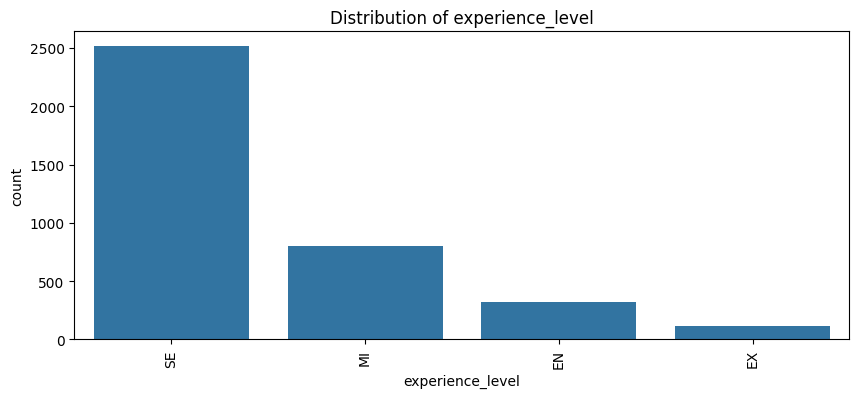

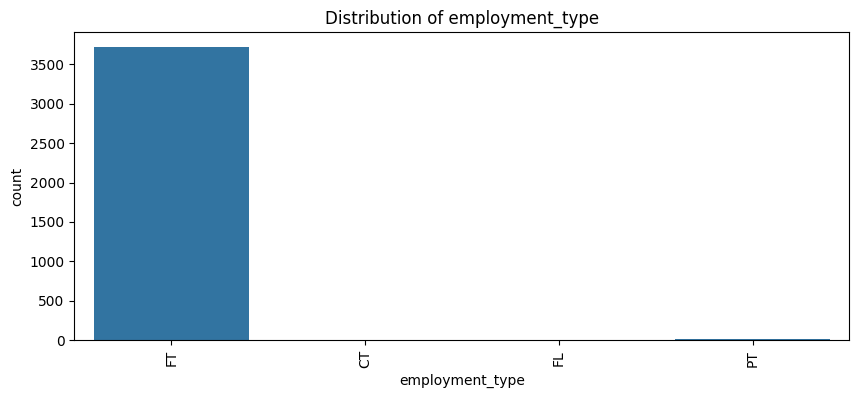

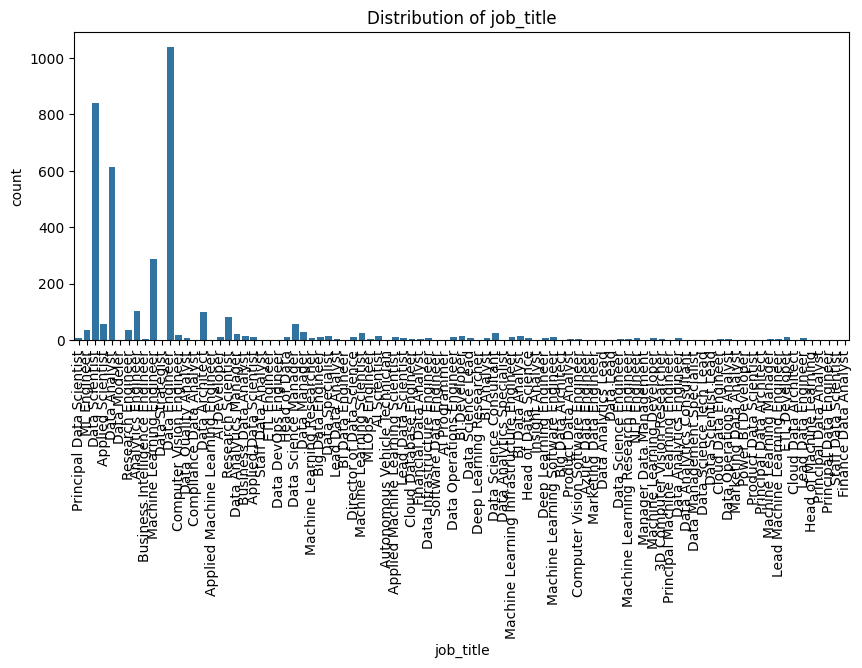

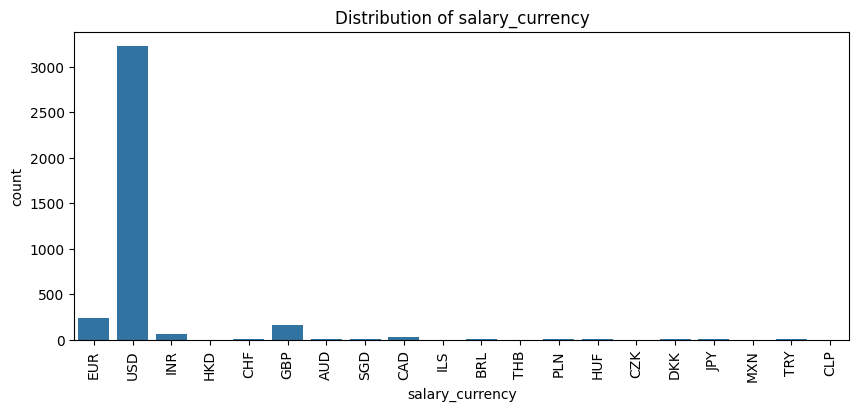

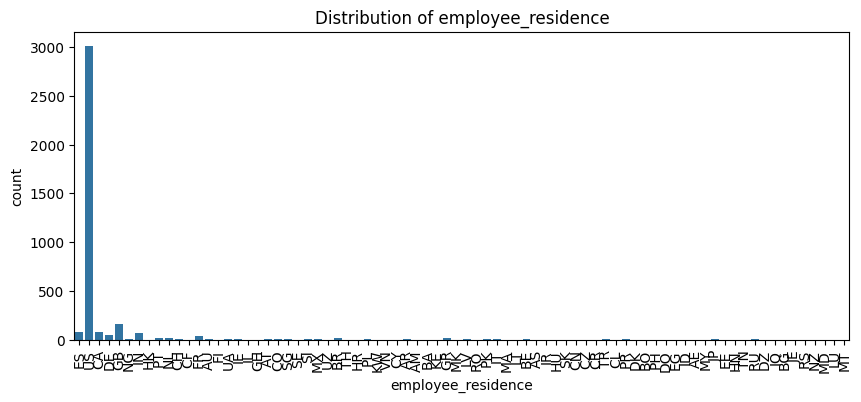

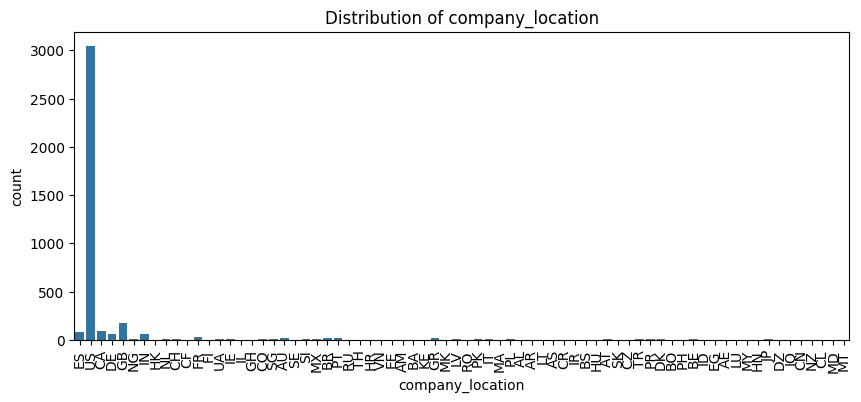

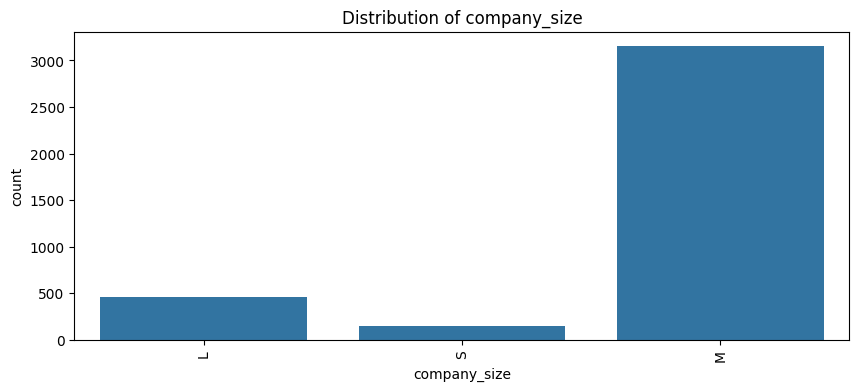

In [15]:
# Plotting categorical variables

for variable in categorical_df:
    plt.figure(figsize=(10,4))
    sns.countplot(x=variable, data=df)
    plt.title(f'Distribution of {variable}')
    plt.xticks(rotation=90)
    plt.show()

In [16]:
fig = make_subplots(rows=4, cols=2, subplot_titles=categorical_df.columns) 

for i, var in enumerate(categorical_df.columns):
    fig.add_trace(go.Histogram(x=df[var], name=var), row=i//2+1, col=i%2+1)
    
fig.update_layout(height=800, width=800, title_text="Categorical variables")
fig.show()

Identify the outliers of our dataset graphically:

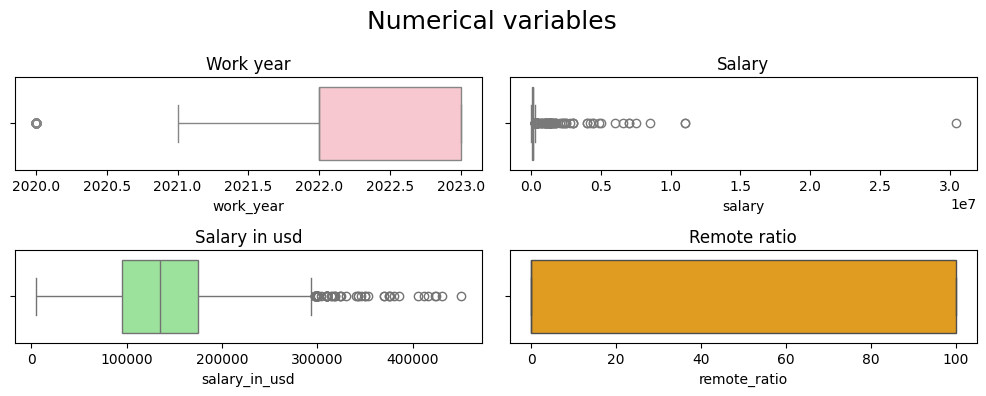

In [17]:
# Boxplot: to check for outliers

# List of numerical variables and their corresponding colors
variables = [('work_year', 'pink'), ('salary', 'lightblue'), ('salary_in_usd', 'lightgreen'), ('remote_ratio', 'orange')]

fig, axes = plt.subplots(2, 2, figsize=(10, 4))
fig.suptitle('Numerical variables', fontsize=18)

# Loop over variables and their corresponding axes
for (var, color), ax in zip(variables, axes.flatten()):
    sns.boxplot(x=df[var], color=color, ax=ax)
    ax.set_title(var.capitalize().replace('_', ' '))

plt.tight_layout()
plt.show()

In [18]:

fig = px.box(df, x='work_year', title='Work year')
fig.show()

fig = px.box(df, x='salary', title='Salary')
fig.show()

fig = px.box(df, x='salary_in_usd', title='Salary_in_usd')
fig.show()

fig = px.box(df, x='remote_ratio', title='Remote_ratio')
fig.show()


Later we will see how to deal with the issue of outliers or delve deeper, for example, into the repeated values ​​and their possible causes. In this exercise we assume that the repeated values ​​are not a generation error of our dataset and that the outliers found are real. Therefore, far from eliminating them, they serve us to perform better data analyzes on our variables in question.

### 2) Second step: visualization and analysis of data in a graphic and attractive way

Once we have cleaned and prepared our data, we are ready to start exploring and visualizing it. If we have not been given a specific goal for our analysis, it is very useful to ask questions about our data. These questions will guide our visualizations and analysis, helping us uncover patterns, trends, and valuable insights.

#### Questions to solve using the graphic creation libraries seen in class:

What is the average salary by experience level?

In [19]:
df.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

In [20]:
fig = px.box(df, x='experience_level', y='salary_in_usd', title='Salary by experience level')
fig

In [21]:
fig = px.funnel(df, x='experience_level', y='salary_in_usd', title='Salary by experience level')
fig

In [22]:
fig = px.histogram(df, x='experience_level', y='salary_in_usd', title='Salary by experience level', histfunc='avg')
fig

In [23]:
# let's see the mean salary by experience level and job title using plotly express, using a strip plot:

fig = px.strip(df, x='experience_level', y='salary_in_usd', color='job_title', title='Mean salary by experience level and job title')

fig

How has the average salary changed over time (work_year)?

In [24]:
# calculate the mean salary per year
df.groupby('work_year')['salary'].mean()

# plotting the evolution of the mean salary per year
fig = px.line(df.groupby('work_year')['salary'].mean(), title='Evolution of the mean salary per year')
fig.show()


In [25]:
# calculate the mean salary per year
df.groupby('work_year')['salary_in_usd'].mean()

# plotting the evolution of the mean salary per year
fig = px.line(df.groupby('work_year')['salary_in_usd'].mean(), title='Evolution of the mean salary per year')
fig.show()

In [26]:
# using area plot to visualize the evolution of the mean salary per year
fig = px.area(df.groupby('work_year')['salary_in_usd'].mean(), title='Evolution of the mean salary per year')
fig.show()

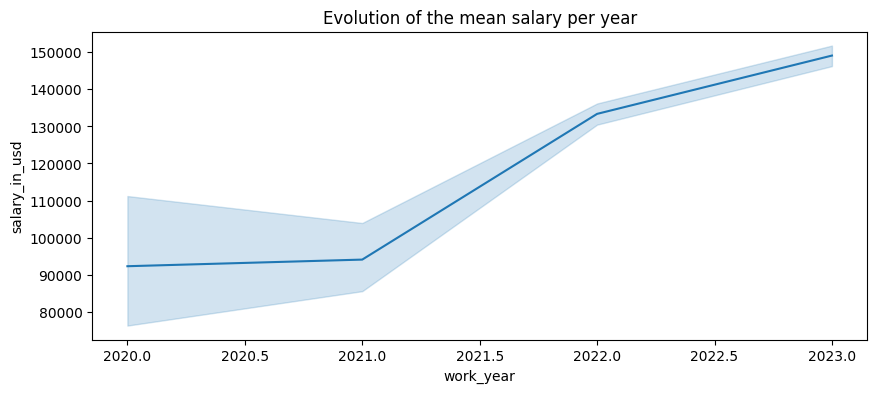

In [27]:
# lineplot using sns
plt.figure(figsize=(10,4))
sns.lineplot(x=df['work_year'], y=df['salary_in_usd'])
plt.title('Evolution of the mean salary per year')
plt.show()

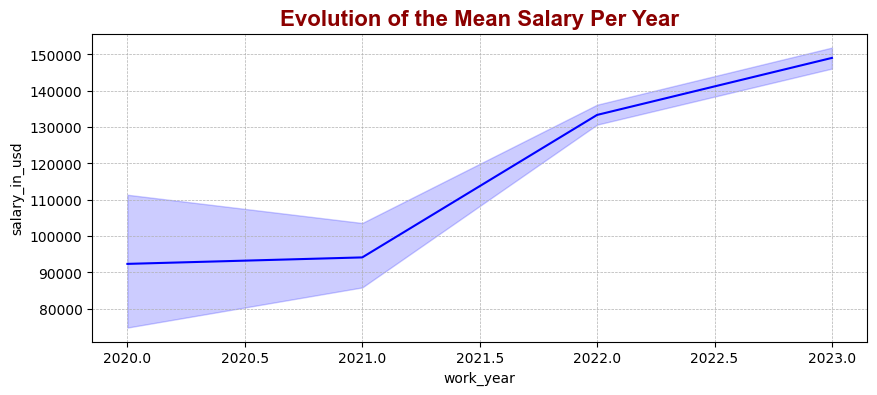

In [28]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=df['work_year'], y=df['salary_in_usd'], color='blue')
plt.title('Evolution of the Mean Salary Per Year', fontsize=16, fontweight='bold', color='darkred', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

What is the proportion of remote work among different job roles?

In [29]:
df.head(2)

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   

  company_location company_size  
0               ES            L  
1               US            S

In [30]:
# to see the proportion of remote_ratio aming different job roles:
fig = px.sunburst(df, path=['job_title', 'remote_ratio'], title='Proportion of remote_ratio among different job roles')
fig.update_layout(legend_title_text='Remote ratio')
fig.show()

In [31]:
# Agrupar datos por job_title y calcular el promedio de remote_ratio
df_grouped = df.groupby('job_title', as_index=False)['remote_ratio'].mean()

# Crear el gráfico de barras horizontal
fig = px.bar(df_grouped, y='job_title', x='remote_ratio', 
             color='remote_ratio', 
             title='Proportion of Remote Ratio Among Different Job Roles',
             labels={'remote_ratio': 'Remote Ratio (%)', 'job_title': 'Job Role'},
             color_continuous_scale='RdYlBu', orientation='h')

# Actualizar el layout del gráfico
fig.update_layout(
    legend_title_text='Remote Ratio',
    template='plotly_dark',
    title_font_size=20,
    legend=dict(
        title=dict(font=dict(size=15)),
        font=dict(size=12)
    ),
    yaxis_title='Job Role',
    xaxis_title='Remote Ratio (%)',
    margin=dict(t=50, l=25, r=25, b=25)
)

# Mostrar el gráfico
fig.show()

In [32]:
# Ordenar el DataFrame por remote_ratio de menor a mayor
df_grouped = df_grouped.sort_values(by='remote_ratio')

# Crear el gráfico de barras horizontal
fig = px.bar(df_grouped, y='job_title', x='remote_ratio', 
             color='remote_ratio', 
             title='Proportion of Remote Ratio Among Different Job Roles',
             labels={'remote_ratio': 'Remote Ratio (%)', 'job_title': 'Job Role'},
             color_continuous_scale='RdYlBu', orientation='h')

# Actualizar el layout del gráfico
fig.update_layout(
    legend_title_text='Remote Ratio',
    template='plotly_dark',
    title_font_size=20,
    legend=dict(
        title=dict(font=dict(size=15)),
        font=dict(size=12)
    ),
    yaxis_title='Job Role',
    xaxis_title='Remote Ratio (%)',
    margin=dict(t=50, l=25, r=25, b=25)
)

# Mostrar el gráfico
fig.show()

Is there a relationship between company size and salary?

In [33]:
# plotting the company size distribution vs the salary
fig = px.box(df, x='company_size', y='salary_in_usd', title='Company size distribution vs the salary',
             category_orders={'company_size': ['S', 'M', 'L']}, 
             template='plotly_dark', color='company_size', color_discrete_map={'S': 'pink', 'M': 'lightgreen', 'L': 'lightblue'})
fig.show()

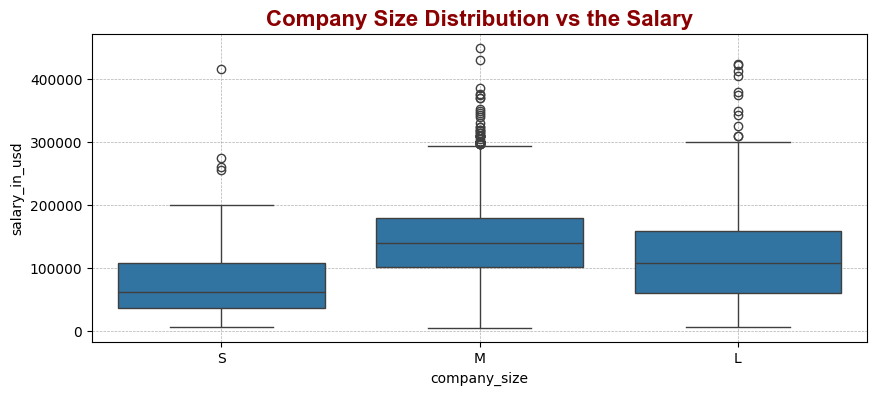

In [34]:
# using seaborn to plot the company size distribution vs the salary
plt.figure(figsize=(10, 4))
sns.boxplot(x='company_size', y='salary_in_usd', data=df, order=['S', 'M', 'L'])
plt.title('Company Size Distribution vs the Salary', fontsize=16, fontweight='bold', color='darkred', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


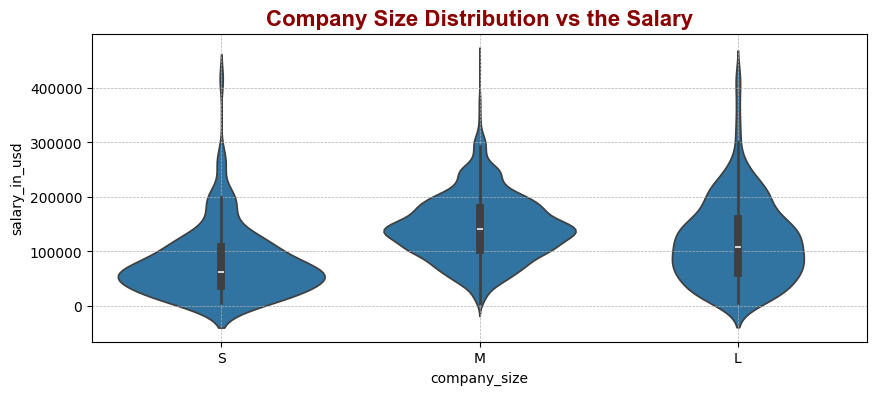

In [35]:
# using violin plot to visualize the company size distribution vs the salary
plt.figure(figsize=(10, 4))
sns.violinplot(x='company_size', y='salary_in_usd', data=df, order=['S', 'M', 'L'])
plt.title('Company Size Distribution vs the Salary', fontsize=16, fontweight='bold', color='darkred', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [36]:
# using violin plot with pyplot express to visualize the company size distribution vs the salary
fig = px.violin(df, x='company_size', y='salary_in_usd', title='Company size distribution vs the salary',
                category_orders={'company_size': ['S', 'M', 'L']}, 
                template='plotly_dark', color='company_size', color_discrete_map={'S': 'pink', 'M': 'lightgreen', 'L': 'lightblue'})
fig.show()

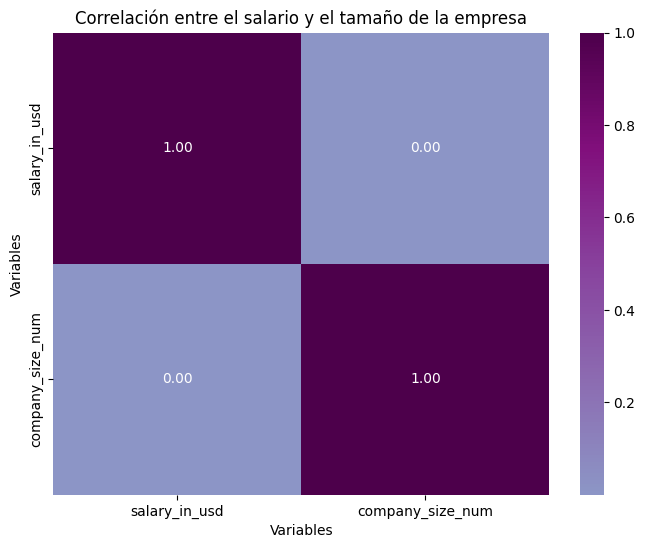

In [37]:
# Mapear el tamaño de la empresa a números: "S"->1, "M"->2, "L"->3
company_size_map = {'S': 1, 'M': 2, 'L': 3}
df['company_size_num'] = df['company_size'].map(company_size_map)

# Calcular la matriz de correlación
corr = df[['salary_in_usd', 'company_size_num']].corr()

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='BuPu', center=0, fmt=".2f")
plt.title('Correlación entre el salario y el tamaño de la empresa')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

Which country has the most remote workers?

In [38]:
fig = px.bar(df, x='employee_residence', y='remote_ratio', title='Country with the most remote workers',
             color='remote_ratio', color_continuous_scale='RdYlBu')
fig

In [39]:
# plot the 10 countries with the most number of remote workers
fig = px.bar(df['employee_residence'].value_counts().head(10), title='Top 10 countries with the most remote workers',
             color=df['employee_residence'].value_counts().head(10).values, color_continuous_scale='RdYlBu')
fig

In [40]:
# Group the data by 'employee_residence' and calculate the sum of 'remote_ratio' for each group
remote_work_by_country = df.groupby('employee_residence')['remote_ratio'].sum().reset_index()

# Sort the data by 'remote_ratio' in descending order
remote_work_by_country_sorted = remote_work_by_country.sort_values('remote_ratio', ascending=False)

# Create a bar plot of 'remote_ratio' for each 'employee_residence'
fig = px.bar(remote_work_by_country_sorted, x='employee_residence', y='remote_ratio', color='remote_ratio',
             color_continuous_scale='Blues', labels={'employee_residence': 'Country', 'remote_ratio': 'Remote Ratio'},
             title='Cantidad de trabajadores remotos por país', template="plotly_dark")

# Rotate the x-axis labels by 90 degrees
fig.update_xaxes(tickangle=90)

# Display the plot
fig.show()

How has the proportion of remote work changed over time?

In [41]:
# line plot to visualice the proportion of remote work over the years
fig = px.line(df.groupby('work_year')['remote_ratio'].mean(), 
              title='Proportion of remote work over the years',
              template='plotly_dark', labels={'value': 'Remote ratio (%)', 'work_year': 'Year'},
              color_discrete_sequence=['red'], width=800, height=400)
fig.show()


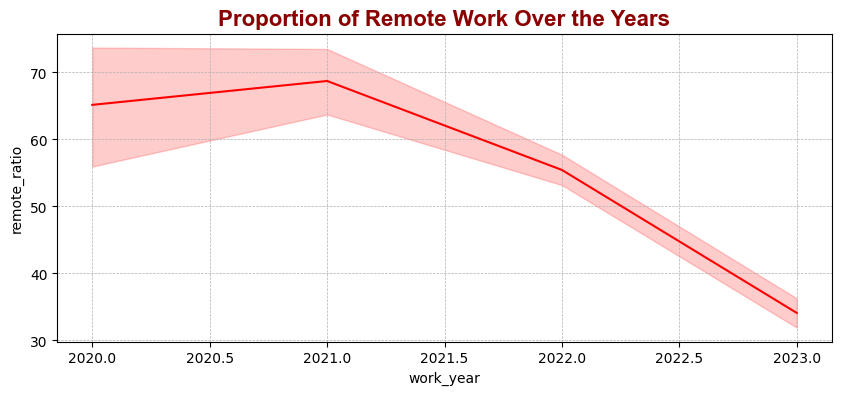

In [42]:
# with seaborn
plt.figure(figsize=(10, 4))
sns.lineplot(x='work_year', y='remote_ratio', data=df, color='red')
plt.title('Proportion of Remote Work Over the Years', fontsize=16, fontweight='bold', color='darkred', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


What is the country with the highest average salaries in USD?

In [43]:
# order the countries by the highest average salary in usd and plot the top 10
df_grouped = df.groupby('employee_residence', as_index=False)['salary_in_usd'].mean()
df_grouped = df_grouped.sort_values(by='salary_in_usd', ascending=False)

fig = px.bar(df_grouped, x='employee_residence', y='salary_in_usd', title='Top 10 countries with the highest average salary in usd',
                template='plotly_dark', color='salary_in_usd', color_continuous_scale='Viridis')
fig.show()

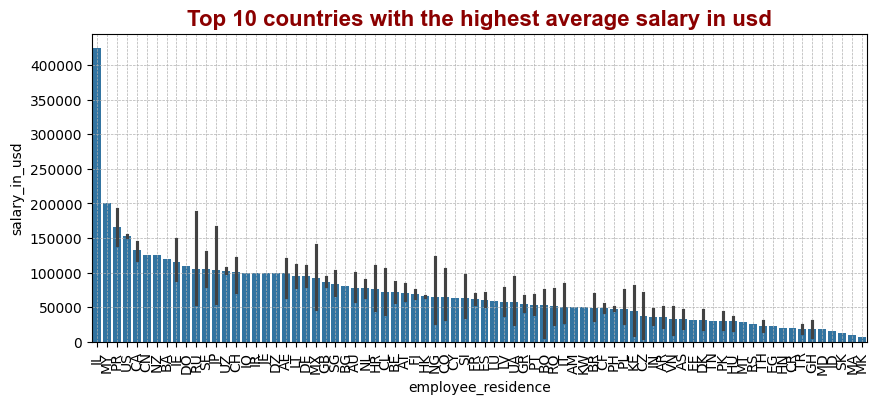

In [44]:
# using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x='employee_residence', y='salary_in_usd', data=df, order=df_grouped['employee_residence'])
plt.title('Top 10 countries with the highest average salary in usd', fontsize=16, fontweight='bold', color='darkred', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=90)
plt.show()

How are job roles distributed across different experience categories?

In [45]:
# visualizinf the distribution of job roles across different experience levels
fig = px.sunburst(df, path=['experience_level', 'job_title'], 
                  title='Distribution of job roles across different experience levels',
                  template='plotly_dark')
fig.update_layout(legend_title_text='Job title')
fig.show()


In [46]:
# Group the data by 'experience_level' and 'job_title' and calculate the size of each group
experience_job_ds = df.groupby(['experience_level', 'job_title']).size().reset_index(name='Count') 

# Create a treemap of 'Count' for each 'experience_level' and 'job_title'
fig = px.treemap(experience_job_ds, path=['experience_level', 'job_title'], values='Count', color='Count',
                 color_continuous_scale='Sunset', title="Experience Level and Job Title Distribution", template="plotly_dark")

# Display the plot
fig.show()

How does the average salary vary between different types of employment, full-time, part-time, etc.?

In [47]:
df.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  company_size_num  
0               ES            L                 3  
1               US            S                 1  
2               US            S                 1  
3               CA            M                 2  
4               CA            M                 2

In [48]:
# plot how average salary changes among different employment types
fig = px.bar(df.groupby('employment_type')['salary'].mean(), title='Average salary by employment type',)
fig.show()


Create a top 10 with the most in-demand jobs:

In [49]:
# creating a top 10 with the most in-demand job titles:

top_10_job_titles = df['job_title'].value_counts().head(10)
top_10_job_titles

# and plot it

fig = px.bar(top_10_job_titles, x=top_10_job_titles.index, y=top_10_job_titles.values, title='Top 10 most in-demand job titles')
fig.show()

In [50]:
top_10_job_titles

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: count, dtype: int64

In [51]:
# using px.piex to visualize the distribution of job titles
fig = px.pie(top_10_job_titles, values=top_10_job_titles.values, names=top_10_job_titles.index, title='Top 10 most in-demand job titles')
fig.show()

C:\Users\mar27\AppData\Local\Temp\ipykernel_12720\1017296953.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




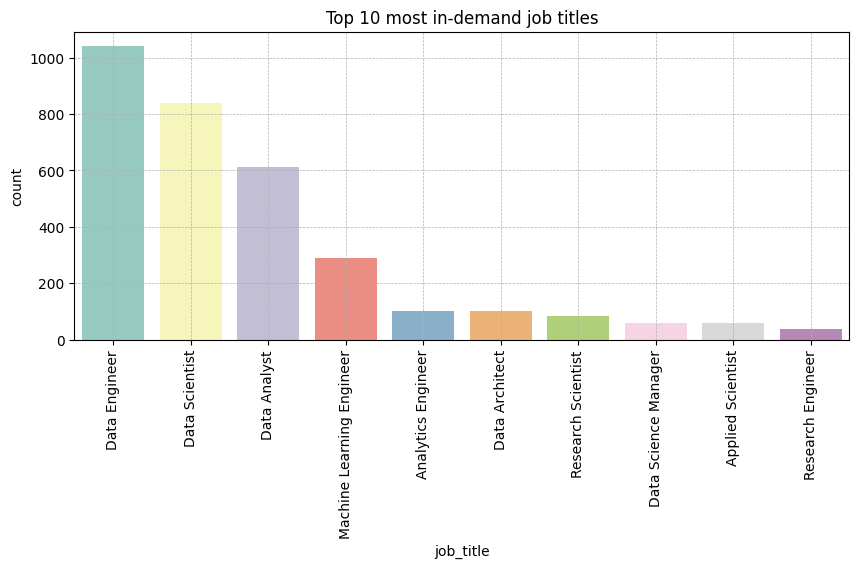

In [52]:
# using sns countplot to visualize the distribution of job titles
plt.figure(figsize=(10, 4))
sns.countplot(x='job_title', data=df, order=df['job_title'].value_counts().index[:10],palette='Set3')
plt.title('Top 10 most in-demand job titles')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=90)
plt.show()


C:\Users\mar27\AppData\Local\Temp\ipykernel_12720\4033684178.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




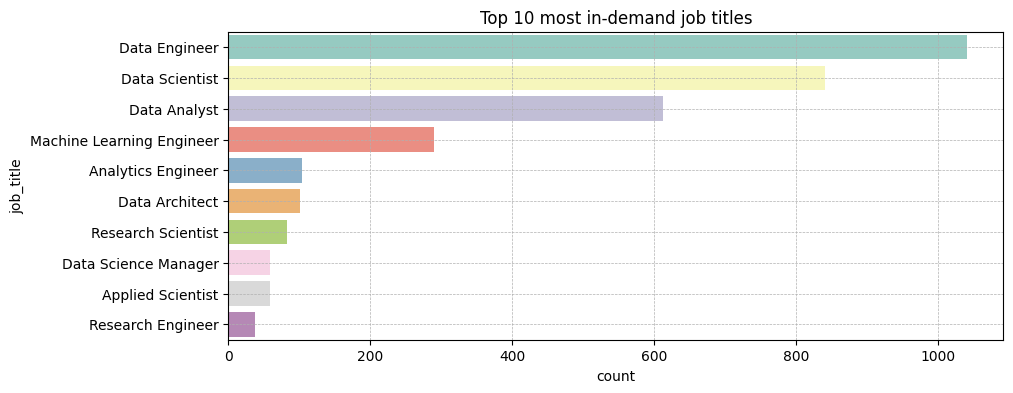

In [53]:
plt.figure(figsize=(10, 4))
sns.countplot(y='job_title', data=df, order=df['job_title'].value_counts().index[:10], palette='Set3')
plt.title('Top 10 most in-demand job titles')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

C:\Users\mar27\AppData\Local\Temp\ipykernel_12720\3230842161.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




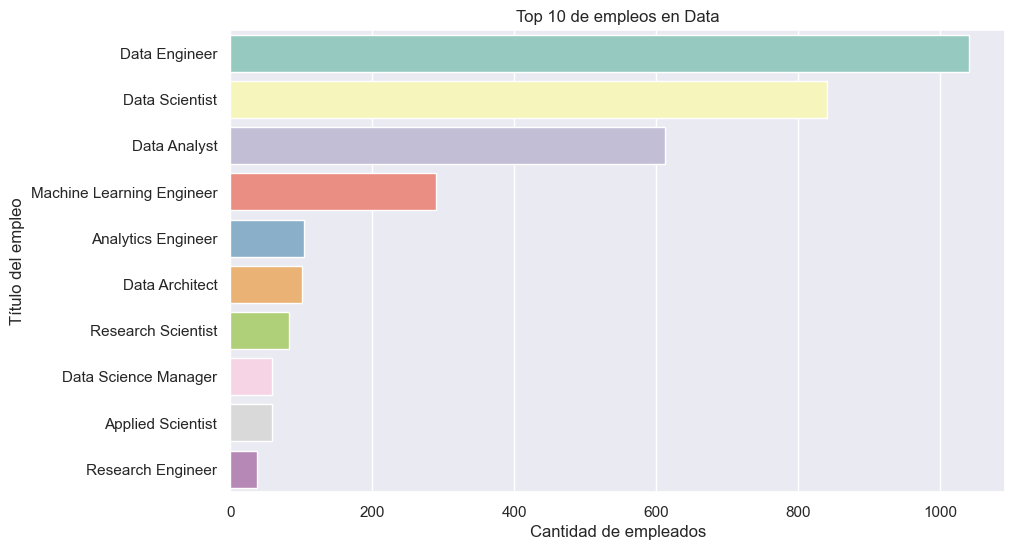

In [54]:
# Get the top 10 job titles
top10_empleos = df.job_title.value_counts()[:10].index.tolist()

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the theme for the plot
sns.set_theme(style='darkgrid')

# Create a countplot of the top 10 job titles
sns.countplot(data=df[df.job_title.isin(top10_empleos)], y='job_title', palette='Set3', order=top10_empleos)

# Set the title of the plot
plt.title('Top 10 de empleos en Data')

# Set the x-axis label
plt.xlabel('Cantidad de empleados')

# Set the y-axis label
plt.ylabel('Título del empleo')

# Display the plot
plt.show()

Create a top10 with the most sought-after jobs:

In [55]:
# Create a top10 with the most sought-after jobs:

top_10_job_titles = df['job_title'].value_counts().head(10)
top_10_job_titles

# plot it
fig = px.bar(top_10_job_titles, x=top_10_job_titles.index, y=top_10_job_titles.values, title='Top 10 most sought-after jobs')
fig.show()


In [56]:
top_10_job_titles.index

Index(['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Analytics Engineer', 'Data Architect',
       'Research Scientist', 'Data Science Manager', 'Applied Scientist',
       'Research Engineer'],
      dtype='object', name='job_title')

In [57]:
# using px.bar horizontal to visualize the distribution of job titles
fig = px.bar(top_10_job_titles, x=top_10_job_titles.values, 
             y=top_10_job_titles.index, 
             title='Top 10 most sought-after jobs', orientation='h',
             labels={'index': 'Job title', 'value': 'Count'},
             template='plotly_dark',color=top_10_job_titles.index, color_continuous_scale='Sunset')
fig.show()


Create a top10 with jobs where we can work remotely:

In [58]:
# split remote_ratio into 2 categories: 0 and 1, with a threshold of 0.75

df['remote_ratio'] = np.where(df['remote_ratio'] >= 0.75, 1, 0)
df['remote_ratio'].value_counts()

# top 10 jobs where can work remotely:

top_10_remote_jobs = df[df['remote_ratio'] == 1]['job_title'].value_counts().head(10)
top_10_remote_jobs

# plot it

fig = px.bar(top_10_remote_jobs, x=top_10_remote_jobs.index, y=top_10_remote_jobs.values, title='Top 10 jobs where you can work remotely')
fig.show()


In [59]:
# using a funnel plot to visualize the top 10 jobs where you can work remotely
fig = px.funnel(top_10_remote_jobs, x=top_10_remote_jobs.values, y=top_10_remote_jobs.index, title='Top 10 jobs where you can work remotely')
fig.show()